In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import tire
import car
from scipy.optimize import newton
con = 180/np.pi

In [2]:
params = {
    'W_uf' : 111,    #Front unsprung weight (N)
    'W_ur' : 111,    #Rear unsprung weight  (N)
    'W_s'  : 2446,   #Sprung weight         (N)
    # CG locations
    'z_wf' : 0.21,   #Front unsprung height (m)
    'z_wr' : 0.21,   #Rear unsprung height  (m)
    'h_s'  : 0.23,   #Sprung height         (m)
    'a_s'  : 0.76,   #Sprung distance from front axle (m)
    # Car geometry
    'l'    : 1.524,  #Wheelbase   (m)
    't_f'  : 1.22,   #Front track (m)
    't_r'  : 1.22,   #Rear track  (m)
    # Roll center heights
    'z_rf' : 0.038,  #Front roll center height (m)
    'z_rr' : 0.076,  #Rear roll center height  (m)
    # Roll rates
    'K_f'  : 16.5e3, #Front roll rate (N-m/rad)
    'K_r'  : 32.0e3, #Rear roll rate  (N-m/rad)
    # Steering
    'ack'  : 0.0,    #Steering Ackerman (%)
    'toe_f': 0.5,   #Front toe (deg)
    'toe_r': 1.0,    #Rear toe  (deg)
    'tire' : tire.Hoosier10X7()
}
C = car.Car(params)

Roll axis inclination: 1.43 deg
Unsprung CG height from roll axis: 0.17 m
Roll sensitivity: -0.50 deg/g
Front lateral weight transfer: 174.81 N/g
Rear lateral weight transfer:  324.43 N/g
Longitudinal weight transfer:       399.74 N/g
Front static wheel load:            -668.60 N
Rear static wheel load:             -665.40 N
Total weight:     -2668.00 N


In [3]:
N = 50
M = 50
r = np.linspace(4, 25, M)
beta = np.linspace(-6, 3, N)
beta *= 1/con
delta = np.zeros((M, N), dtype='double')
Ay = np.zeros((M, N), dtype='double')
Fx = np.zeros((M, N), dtype='double')
betaM = np.zeros(M, dtype='double')
deltaM = np.zeros(M, dtype='double')
AyM = np.zeros(M, dtype='double')
for i in range(M):
    for j in range(N):
        delta[i, j] = C.get_delta(r[i], beta[j], delta0=80/r[i]/con)
        Ay[i, j], Fx[i, j] = C.Ay_Fx_from_angle(r[i], beta[j], delta[i, j])
    sel = np.invert(np.isnan(Ay[i, :]))
    betaM[i] = beta[sel][0]
    deltaM[i] = delta[i, sel][0]
    AyM[i] = Ay[i, sel][0]

C:\Users\rober\Dropbox\FSAE\Calculations\SteadyState\SteadyState\tire.py:40: RuntimeWarning: invalid value encountered in sqrt
  multi = np.sqrt(1-(SR/(Fz*mux))**2) * 0.65


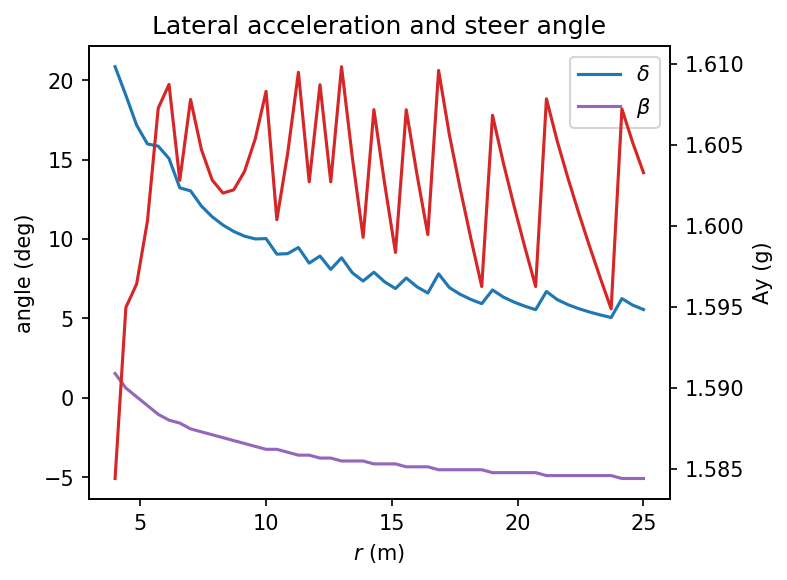

In [4]:
plt.figure(figsize=(5,4), dpi=150)
plt.plot(r, deltaM*con, 'tab:blue')
plt.plot(r, betaM*con, 'tab:purple')
plt.title('Lateral acceleration and steer angle')
plt.xlabel(r'$r$ (m)')
plt.ylabel(r'angle (deg)')
plt.legend([r'$\delta$', r'$\beta$'])
plt.twinx()
plt.plot(r, AyM, 'tab:red')
plt.ylabel(r'Ay (g)')
plt.show()